# Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.

**Min-Max scaling**, a fundamental data preprocessing technique used to transform numerical data into a specific range, typically between **0 and 1**. This process ensures that all features contribute equally to the analysis, preventing any single variable from dominating the model's performance².

Here's how Min-Max scaling works:

1. **What is Min-Max Scaling?**
   - Min-Max scaling, also known as **feature scaling**, shrinks the data within a given range (usually 0 to 1).
   - Unlike standardization, which centers the data around zero with unit variance, Min-Max scaling maintains the original distribution shape.
   - It's particularly useful when you want to compare features on a common scale.

2. **The Transformation Equation**:
   - Given a feature vector **X**, the transformation is as follows:
     - First, standardize each feature independently:
       \[X_{\text{std}} = \frac{{X - X_{\text{min}}}}{{X_{\text{max}} - X_{\text{min}}}}\]
     - Then, scale the standardized features to the desired range:
       \[X_{\text{scaled}} = X_{\text{std}} \cdot (\text{max} - \text{min}) + \text{min}\]
     - Here, \(\text{min}\) and \(\text{max}\) represent the desired feature range.



In [13]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
a=sns.load_dataset("taxis")
min_max=MinMaxScaler()
b=min_max.fit_transform(a[['distance']])
b

array([[0.04359673],
       [0.02152589],
       [0.0373297 ],
       ...,
       [0.11280654],
       [0.03051771],
       [0.10490463]])

# Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.

1. **Unit Vector Scaling (Normalization)**:
   - **Objective**: Unit vector scaling transforms a dataset's features into a uniform scale where each data point has the same magnitude (Euclidean norm) of 1.
   - **Process**:
     - For each feature, subtract the minimum value from each data point.
     - Divide the result by the range (maximum value minus minimum value).
   - **Range**: Typically scales values between 0 and 1.
   - **Purpose**: Useful when the trend of the data is more interesting than its precise magnitude.
   - **Formula**:
     \[X_{\text{scaled}} = \frac{{X - X_{\text{min}}}}{{X_{\text{max}} - X_{\text{min}}}}\]

2. **Min-Max Scaling**:
   - **Objective**: Min-Max scaling (also known as normalization) scales features to a specific range (e.g., [0, 1]).
   - **Process**:
     - For each feature, transform data to maintain the relative relationship between values.
     - Preserves the shape of the distribution.
   - **Formula**:
     \[X_{\text{min-max}} = \frac{{X - X_{\text{min}}}}{{X_{\text{max}} - X_{\text{min}}}}\]

3. **Comparison**:
   - **Unit Vector Scaling**:
     - Scales each feature to have a magnitude of 1 (Euclidean norm).
     - Focuses on direction rather than absolute values.
     - Useful when relative trends matter more.
   - **Min-Max Scaling**:
     - Scales features to a specific range (e.g., [0, 1]).
     - Preserves the shape of the distribution.
     - Useful for maintaining relative relationships.

4. **Example Illustration**:
   Let's consider a dataset with the following values:
   \[
   \begin{align*}
   \text{Data} &= \left[[-1, 2], [-0.5, 6], [0, 10], [1, 18]\right] \\
   \end{align*}
   \]
   We'll apply Unit Vector Scaling and Min-Max Scaling to this data:

   - **Unit Vector Scaling**:
     - Calculate the Euclidean norm for each data point.
     - Divide each data point by its Euclidean norm.
     - Resulting scaled data:
       \[
       \begin{align*}
       \text{Scaled Data} &= \left[\left[-0.447, 0.894\right], \left[-0.078, 0.997\right], [0, 1], [0.055, 0.998]\right] \\
       \end{align*}
       \]

   - **Min-Max Scaling**:
     - Calculate the minimum and maximum values for each feature.
     - Apply the Min-Max scaling formula.
     - Resulting scaled data:
       \[
       \begin{align*}
       \text{Scaled Data} &= \left[\left[0, 0\right], \left[0.25, 0.25\right], [0.5, 0.5], [1, 1]\right] \\
       \end{align*}
       \]

   In both cases, the data is scaled within the desired range, but the approaches differ in their focus.


In [27]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
a=sns.load_dataset("taxis")
df=pd.DataFrame(normalize(a[['total','fare']]))
df

,0,1
0,0.879707,0.475517
1,0.880775,0.473535
2,0.883697,0.468060
3,0.807411,0.589989
4,0.830139,0.557556
...,...,...
6428,0.816327,0.577590
6429,0.711933,0.702247
6430,0.734152,0.678985
6431,0.749838,0.661622


# Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.

PCA aims to transform a set of correlated variables into a set of uncorrelated variables.
The fundamental idea is to find a new set of axes (principal components) that capture the maximum variance in the data.
PCA is widely used in exploratory data analysis and machine learning for predictive models.

Given a dataset with multiple features (dimensions), PCA identifies a new set of orthogonal axes (principal components).
These components are ranked by the amount of variance they explain.
The first principal component explains the most variance, the second explains the second most, and so on.
By retaining only a subset of these components, we achieve dimensionality reduction.

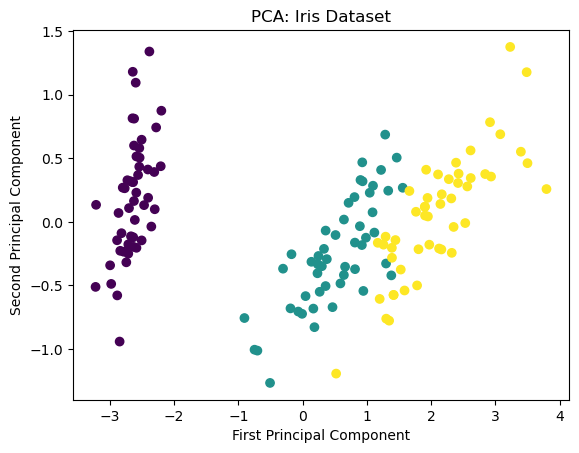

In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (4 dimensions)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Reduced to 2 dimensions

# Visualize the reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: Iris Dataset')
plt.show()


# Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (4 dimensions)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Reduced to 2 dimensions

# Visualize the reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: Iris Dataset')
plt.show()
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (4 dimensions)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Reduced to 2 dimensions

# Visualize the reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: Iris Dataset')
plt.show()
1. **PCA and Feature Extraction**:
    - **Feature extraction** is a technique used to reduce the dimensionality of a dataset while retaining essential information. It aims to transform the original features into a new set of features that capture most of the data's variability.
    - **PCA** is a specific method for feature extraction. It identifies a set of orthogonal axes (principal components) that explain the maximum variance in the data.
    - In summary, PCA is a dimensionality reduction technique that falls under the umbrella of feature extraction.

2. **How PCA Works for Feature Extraction**:
    - Given a dataset with multiple correlated features (dimensions), PCA computes the principal components.
    - These components are linear combinations of the original features.
    - The first principal component explains the most variance, the second explains the second most, and so on.
    - By selecting a subset of these components, we achieve dimensionality reduction while preserving essential patterns.

3. **Example: Iris Dataset with PCA**:
    - Let's consider the **Iris dataset**, which contains measurements of sepal length, sepal width, petal length, and petal width for three species of iris flowers.
    - We'll use PCA to reduce the dimensionality while retaining important information.
    - Here's a Python example using scikit-learn:

    - In this example:
        - We reduced the 4-dimensional feature space to 2 dimensions using PCA.
        - The scatter plot shows the data points projected onto the first two principal components.
        - Even in the reduced space, the separation between iris species is visible.


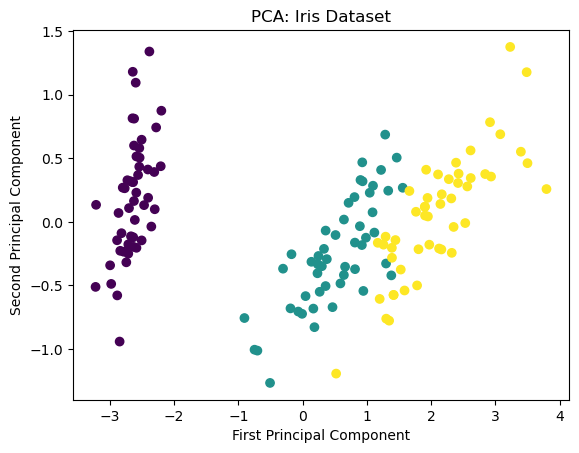

In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (4 dimensions)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # Reduced to 2 dimensions

# Visualize the reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: Iris Dataset')
plt.show()


# Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.

Min-Max scaling (also known as normalization) is a method used to standardize the range of features in your data.
It transforms each feature so that it falls within a specific range, typically [0, 1] or [-1, 1].
The goal is to ensure that all features have a similar scale, which is crucial for many machine learning algorithms.


In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
df=pd.DataFrame([[10,4.5,30],
[20,3.8,45],
[15,4.2,25]],columns=('Price','rating','delivery_time'))
min_max=MinMaxScaler()
b=min_max.fit_transform(df[['Price','rating','delivery_time']])
b

array([[0.        , 1.        , 0.25      ],
       [1.        , 0.        , 1.        ],
       [0.5       , 0.57142857, 0.        ]])

Principal Component Analysis (PCA) is a popular technique used for dimensionality reduction in datasets with many features, like the one you have for predicting stock prices. Here's how I'd approach using PCA in your project:

Data Preprocessing: Start by preprocessing your data, which may involve steps like handling missing values, scaling features to have zero mean and unit variance (standardization), and removing any irrelevant features.

Understanding the Data: It's crucial to understand the nature of your data and the relationships between features. PCA assumes that the data is centered around the origin, so it's essential to preprocess your data accordingly.

Compute Covariance Matrix: PCA works by computing the covariance matrix of your data. This matrix represents the relationships between your features.

Eigenvalue Decomposition: Perform eigenvalue decomposition on the covariance matrix to find the eigenvectors and eigenvalues. Eigenvectors represent the directions of maximum variance in the data, and eigenvalues represent the magnitude of variance along those directions.

Selecting Principal Components: Sort the eigenvectors based on their corresponding eigenvalues in descending order. The eigenvectors with the highest eigenvalues capture the most variance in the data and are termed as principal components (PCs). Choose the top 'k' eigenvectors to retain, where 'k' is the desired dimensionality of your reduced dataset.

Projection: Project your original data onto the selected principal components to obtain the lower-dimensional representation of your dataset.

Model Training: Finally, you can train your predictive model using the reduced-dimensional dataset obtained from PCA.

Model Evaluation: Evaluate the performance of your model using appropriate metrics and iterate on your approach if necessary.

Using PCA can help in reducing the computational complexity of your model while retaining most of the relevant information in the dataset. However, it's essential to consider the trade-offs involved, as reducing dimensionality may lead to some loss of information. Experimenting with different numbers of principal components and evaluating the performance of your predictive model can help find the optimal balance between dimensionality reduction and predictive accuracy.

# Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.

In [55]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
df=pd.DataFrame({'PRICE':(1,5,10,15,20)})
min_max=MinMaxScaler()
b=min_max.fit_transform(df[['PRICE']])
b

array([[0.        ],
       [0.21052632],
       [0.47368421],
       [0.73684211],
       [1.        ]])

# Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?

The number of principal components to retain in PCA depends on the level of variance we want to preserve in the dataset. In general, we want to retain enough principal components to explain a significant portion of the total variance in the data, while also keeping the number of features as small as possible.
To determine how many principal components to retain for the given dataset containing the features height, weight, age, gender, and blood pressure, we would perform the following steps:
Standardize the data: We would first standardize the data by subtracting the mean and dividing by the standard deviation. This ensures that all features have the same scale and helps to improve the performance of PCA.

Compute the covariance matrix: Next, we would compute the covariance matrix of the standardized data. The covariance matrix represents the relationships between the different features in the dataset.

Compute the eigenvectors and eigenvalues: We would then calculate the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the directions in which the data varies the most, while the eigenvalues represent the magnitude of the variation.

Select the principal components: We would then select the top k eigenvectors with the highest eigenvalues. These eigenvectors are known as the principal components and represent the most important features in the dataset.

Evaluate the explained variance: Finally, we would evaluate the amount of variance explained by each principal component and choose the number of principal components that preserve a significant portion of the total variance in the data.

Typically, we would select the number of principal components that can explain at least 80% of the total variance in the data. However, the exact number of principal components to retain may depend on the specific dataset and the problem we are trying to solve.
In summary, we would need to perform PCA on the given dataset to determine the optimal number of principal components to retain based on the amount of variance we want to preserve.
Below is Example code of How I would Perform PCA on above components :

In [56]:
# Generating random data with given features
import numpy as np
import pandas as pd

# Set the seed for reproducibility
np.random.seed(678)

# Generate random data for each feature
height = np.random.normal(loc=170, scale=10, size=10000)
weight = np.random.normal(loc=70, scale=10, size=10000)
age = np.random.randint(18, 65, size=10000)
gender = np.random.choice(['Male', 'Female'], size=10000)
blood_pressure = np.random.normal(loc=120, scale=10, size=10000)

# Combine the data into a Pandas DataFrame
data = pd.DataFrame({'Height': height, 
                     'Weight': weight, 
                     'Age': age, 
                     'Gender': gender, 
                     'Blood Pressure': blood_pressure})

# Print the first 5 rows of the data
data.head()

,Height,Weight,Age,Gender,Blood Pressure
0,197.264488,78.301335,37,Male,123.426840
1,181.909333,71.500660,41,Female,103.227835
2,172.938287,86.183821,46,Male,143.637328
3,188.764607,84.627080,55,Female,113.360023
4,165.582489,65.257311,63,Female,116.065510


In [57]:
# Seperating categorical and numerical variables in data 
cat_cols = list(data.columns[data.dtypes == 'object'])
num_cols = list(data.columns[data.dtypes != 'object'])
# Print Categorical and Numeric Variables
print('Categorical Variables : ',cat_cols)
print('Numerical Variables   : ',num_cols)

Categorical Variables :  ['Gender']
Numerical Variables   :  ['Height', 'Weight', 'Age', 'Blood Pressure']


In [58]:
# Converting Categotrical variables to Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data[cat_cols[0]]=le.fit_transform(data[cat_cols].values.flatten())
data.head()

,Height,Weight,Age,Gender,Blood Pressure
0,197.264488,78.301335,37,1,123.426840
1,181.909333,71.500660,41,0,103.227835
2,172.938287,86.183821,46,1,143.637328
3,188.764607,84.627080,55,0,113.360023
4,165.582489,65.257311,63,0,116.065510


In [59]:
# Applying StandardScaler to entire dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
data_scaled.head()

,Height,Weight,Age,Gender,Blood Pressure
0,2.763392,0.839863,-0.294147,0.99561,0.348117
1,1.212299,0.157775,0.003407,-1.00441,-1.689637
2,0.306094,1.630453,0.375350,0.99561,2.387031
3,1.904781,1.474316,1.044847,-1.00441,-0.667462
4,-0.436947,-0.468415,1.639956,-1.00441,-0.394522


In [60]:
# Perform PCA with 3 components
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

X_pca = pd.DataFrame(pca.fit_transform(data_scaled),columns=['PC1','PC2','PC3'])
# print the variance ratio explained by each principal component
print("Variance Ratio:", pca.explained_variance_ratio_)
print('\nTop 5 rows of transformed PCA data :\n',X_pca.head())

Variance Ratio: [0.20491989 0.20113817 0.20024048]

Top 5 rows of transformed PCA data :
         PC1       PC2       PC3
0  0.179922 -1.464986  0.664593
1 -0.536445 -1.423220  1.533594
2  2.149224  0.738165 -0.709998
3  1.316837 -1.776677  1.784522
4  0.597166 -0.539852  0.356913
